In [1]:
# Importing necessary libraries for data manipulation, visualization, and model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv(r"winequality-red.csv")

In [5]:
df.head() # Displaying the first few rows of the dataset to understand its structure

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape  # Checking the dimensions of the dataset (rows, columns)

(1599, 12)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.info()  # Checking dataset information such as column names, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
df.isnull().sum()  # Check for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df.dropna(inplace = True)  # Drop missing rows 

In [17]:
df.isnull().sum()  # re-Check for missing value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
df.duplicated().sum()

240

In [21]:
df.drop_duplicates(inplace=True) # Removing duplicate rows from the dataset

In [23]:
# Checking if there are any remaining duplicate rows
df.duplicated().sum()

0

<Axes: xlabel='quality'>

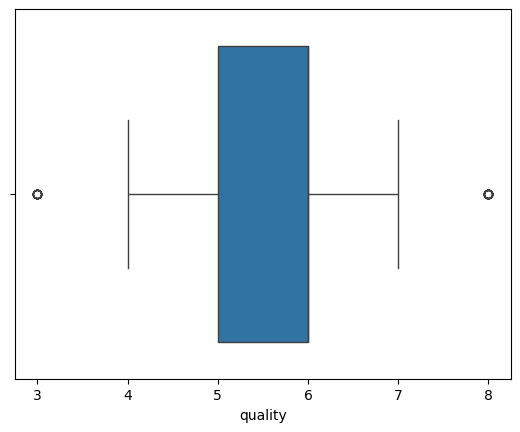

In [25]:
# Visualizing the distribution of 'quality' using a boxplot it helps us to check the outliers
sns.boxplot(x=df["quality"])

In [27]:
# Convert non-numeric to NaN and handle them
df['quality'] = pd.to_numeric(df['quality'], errors='coerce')
# Remove NaN values
df = df.dropna(subset=["quality"])
# Calculate the IQR
q1=df['quality'].quantile(0.25)
q3=df['quality'].quantile(0.75)
iqr=q3-q1

In [29]:
# Define the lower and upper bounds for outliers
lowerbound=q1-3*iqr # 3*IQR instead of 1.5*IQR for stricter filtering
upperbound=q3+3*iqr
lowerbound,upperbound

(2.0, 9.0)

In [31]:
# Filter the data to remove outliers
df2=df[(df["quality"] >= lowerbound) & (df["quality"] <= upperbound)]

<Axes: xlabel='quality'>

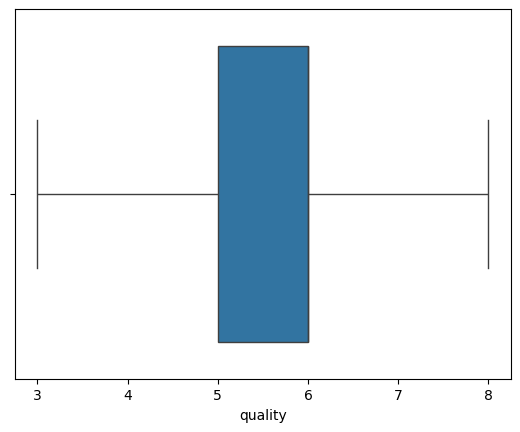

In [33]:
sns.boxplot(x=df2["quality"], whis=3)  # Visualize the data with a boxplot
# It is entirely normal to see small outliers after the extreme ones have been removed.
# These small deviations are part of the natural variability in the dataset and do not indicate any issues with the data.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

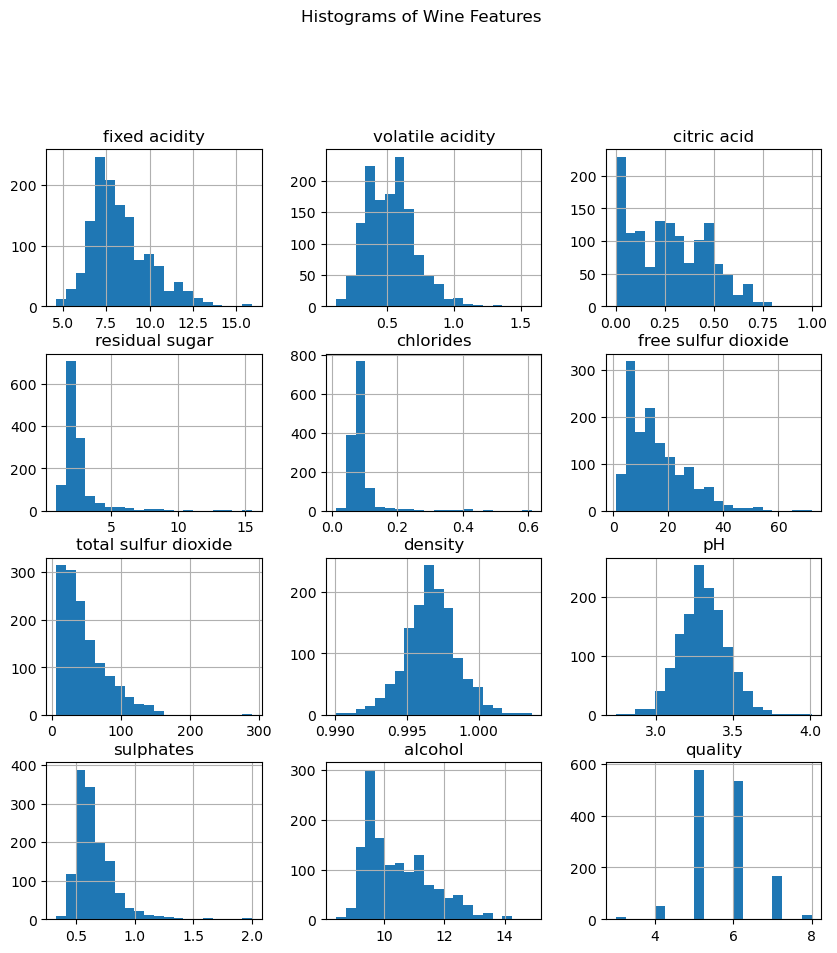

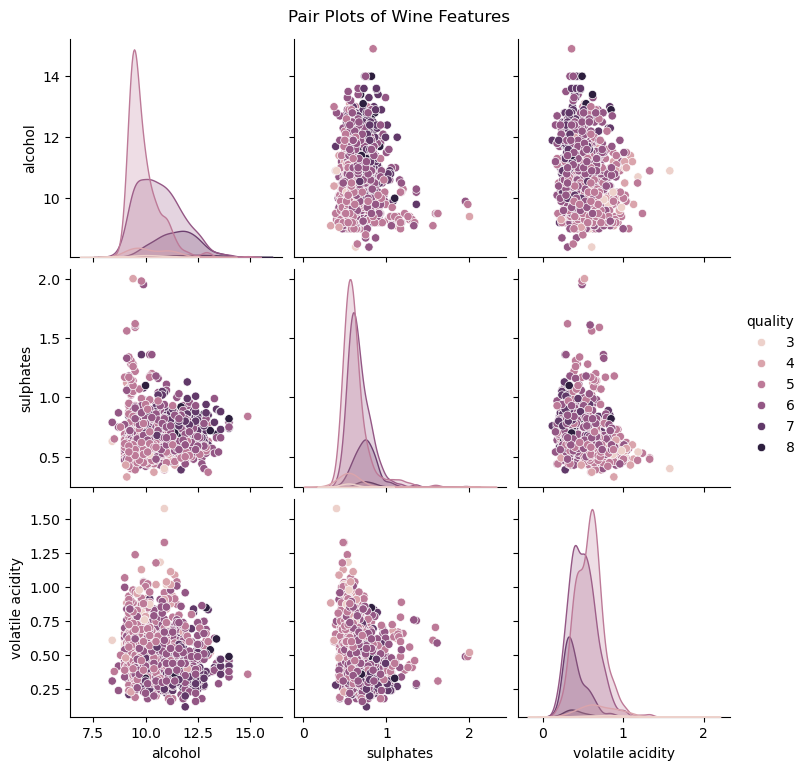

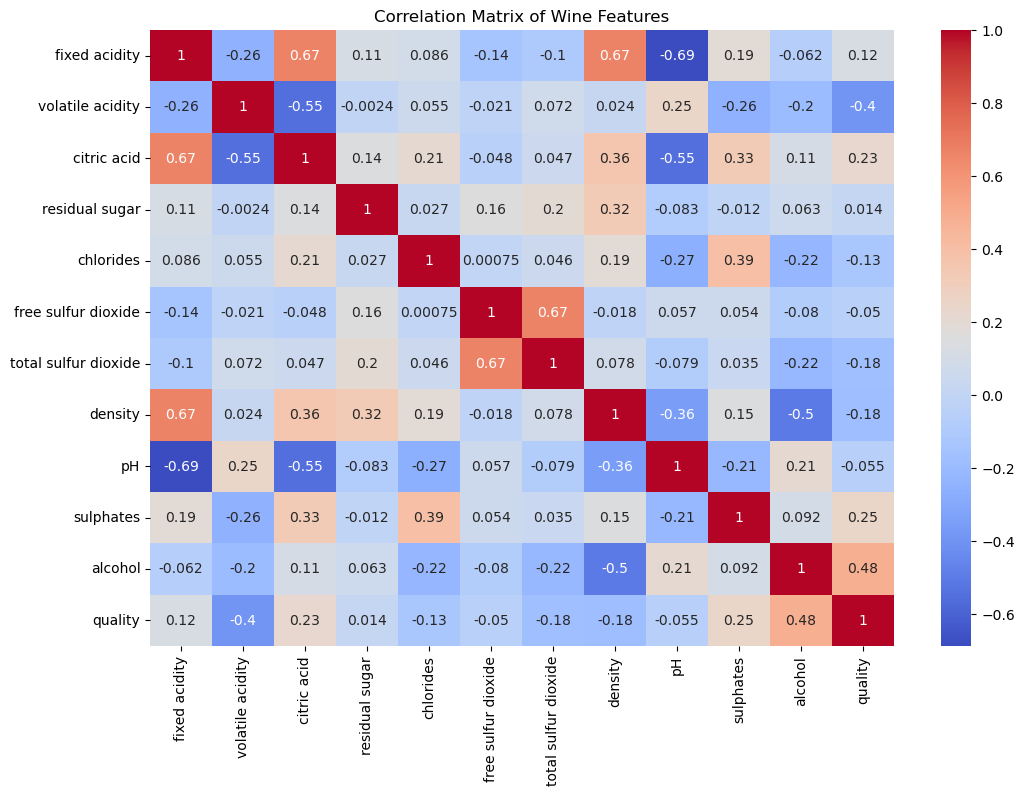

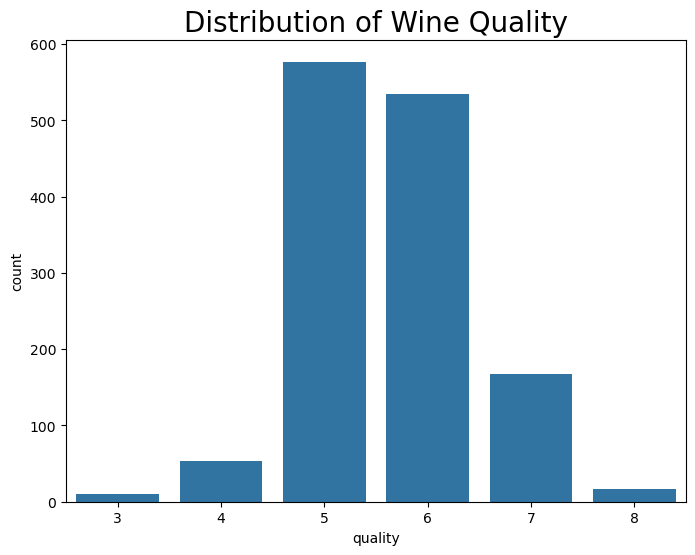

In [49]:
# Split the data into training and testing sets (70% training, 30% testing)
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize/standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)
# Histograms
df.hist(bins=20, figsize=(10,10))
plt.suptitle("Histograms of Wine Features", y=1.02)
plt.show()

# Pair plots (for a subset of features to avoid clutter)
sns.pairplot(df[['quality', 'alcohol', 'sulphates', 'volatile acidity']], hue='quality')
plt.suptitle("Pair Plots of Wine Features", y=1.02)
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Wine Features")
plt.show()

# Bar charts for the quality variable
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality", fontsize=20)
plt.show()

In [39]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the SVM with different kernels
svm_linear = SVC(kernel='linear', random_state=42, probability=True)
svm_linear.fit(X_train_scaled, y_train)

svm_poly = SVC(kernel='poly', degree=3, random_state=42, probability=True)
svm_poly.fit(X_train_scaled, y_train)

svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train_scaled, y_train)

# Evaluate the SVMs
print("SVM - Linear Kernel")
y_pred_linear = svm_linear.predict(X_test_scaled)
print(classification_report(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))

print("\nSVM - Polynomial Kernel")
y_pred_poly = svm_poly.predict(X_test_scaled)
print(classification_report(y_test, y_pred_poly))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("Accuracy:", accuracy_score(y_test, y_pred_poly))

print("\nSVM - RBF Kernel")
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))

SVM - Linear Kernel
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.65      0.76      0.70       172
           6       0.52      0.65      0.57       164
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         4

    accuracy                           0.58       408
   macro avg       0.19      0.23      0.21       408
weighted avg       0.48      0.58      0.53       408

Confusion Matrix:
 [[  0   0   4   1   0   0]
 [  0   0   7   6   0   0]
 [  0   0 131  41   0   0]
 [  0   0  58 106   0   0]
 [  0   0   3  47   0   0]
 [  0   0   0   4   0   0]]
Accuracy: 0.5808823529411765

SVM - Polynomial Kernel
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.12      0.08      0.10        13
           5       0.61      0.72     

C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\m

In [55]:
print("Kernel Performance Comparison:")
print(f"Linear Accuracy:     {accuracy_score(y_test, y_pred_linear):.4f}")
print(f"Polynomial Accuracy: {accuracy_score(y_test, y_pred_poly):.4f}")
print(f"RBF Accuracy:        {accuracy_score(y_test, y_pred_rbf):.4f}")

Kernel Performance Comparison:
Linear Accuracy:     0.5809
Polynomial Accuracy: 0.5613
RBF Accuracy:        0.6348


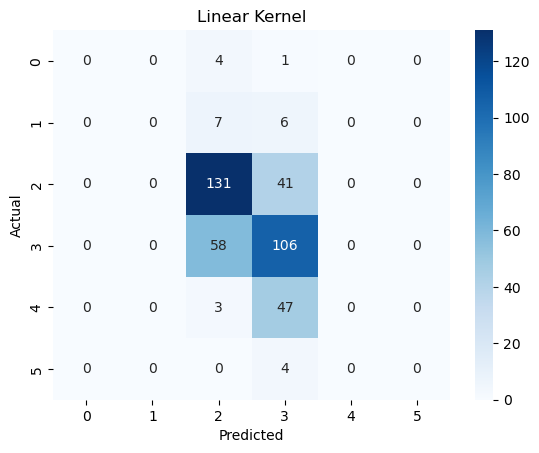

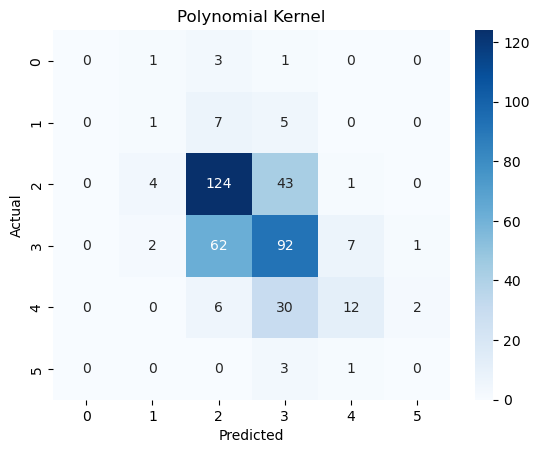

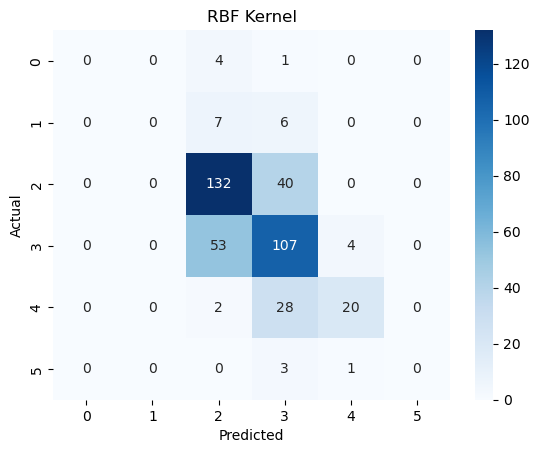

In [51]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion(y_test, y_pred_linear, "Linear Kernel")
plot_confusion(y_test, y_pred_poly, "Polynomial Kernel")
plot_confusion(y_test, y_pred_rbf, "RBF Kernel")

In [41]:
pip install tensorflow

C:\Users\mo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Neural Network - Loss: 1.0405720472335815, Accuracy: 0.5686274766921997
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.14      0.08      0.10        13
           5       0.62      0.74      0.67       172
           6       0.55      0.48      0.51       164
           7       0.48      0.52      0.50        50
           8       0.00      0.00      0.00         4

    accuracy                           0.57       408
   macro avg       0.30      0.30      0.30       408
weighted avg       0.55      0.57      0.55       408

Confusion Matrix:
 [[  0   1   3   0   1   0]
 [  0   1   8   4   0   0]
 [  0   4 127  37   4   0]
 [  0   1  64  78  21   0]
 [  0   0   4  20  26   0]
 [  0   0   0   2   2   0]]


C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


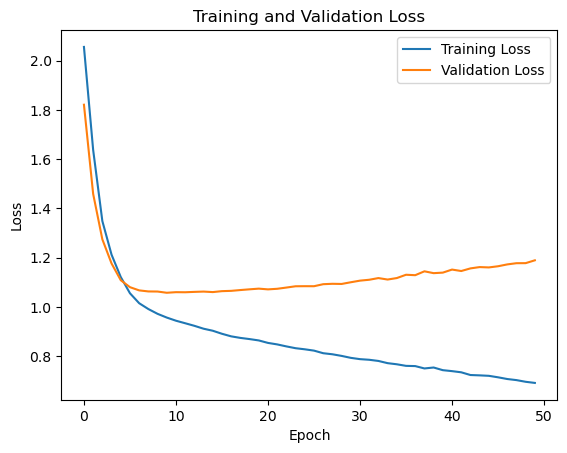

In [43]:
# Neural Network
from tensorflow import keras
from tensorflow.keras import layers

# Define the Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Suitable for integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nNeural Network - Loss: {loss}, Accuracy: {accuracy}")

y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=1)
print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


--- SVM - Linear ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.65      0.76      0.70       172
           6       0.52      0.65      0.57       164
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         4

    accuracy                           0.58       408
   macro avg       0.19      0.23      0.21       408
weighted avg       0.48      0.58      0.53       408

Confusion Matrix:
 [[  0   0   4   1   0   0]
 [  0   0   7   6   0   0]
 [  0   0 131  41   0   0]
 [  0   0  58 106   0   0]
 [  0   0   3  47   0   0]
 [  0   0   0   4   0   0]]
Accuracy: 0.5808823529411765
Precision: 0.4798898869892784
Recall: 0.5808823529411765
F1-score: 0.5254727668845316


C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\m

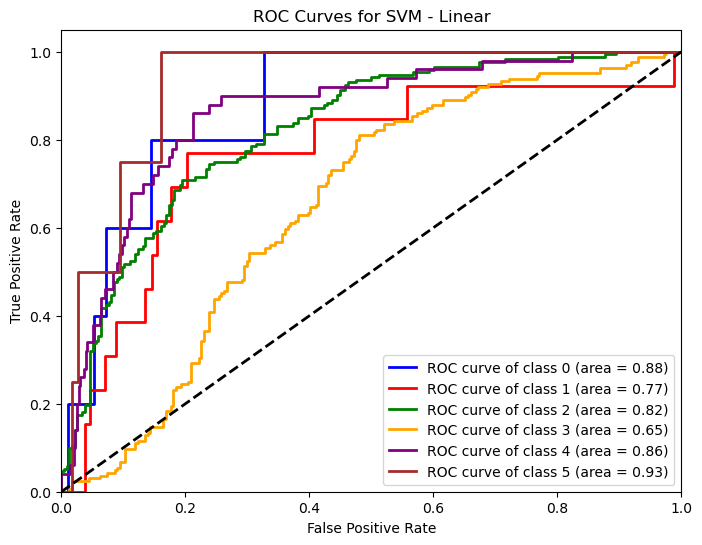


--- SVM - Polynomial ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.12      0.08      0.10        13
           5       0.61      0.72      0.66       172
           6       0.53      0.56      0.54       164
           7       0.57      0.24      0.34        50
           8       0.00      0.00      0.00         4

    accuracy                           0.56       408
   macro avg       0.31      0.27      0.27       408
weighted avg       0.55      0.56      0.54       408

Confusion Matrix:
 [[  0   1   3   1   0   0]
 [  0   1   7   5   0   0]
 [  0   4 124  43   1   0]
 [  0   2  62  92   7   1]
 [  0   0   6  30  12   2]
 [  0   0   0   3   1   0]]
Accuracy: 0.5612745098039216
Precision: 0.5453265457486056
Recall: 0.5612745098039216
F1-score: 0.5428212895429022


C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\m

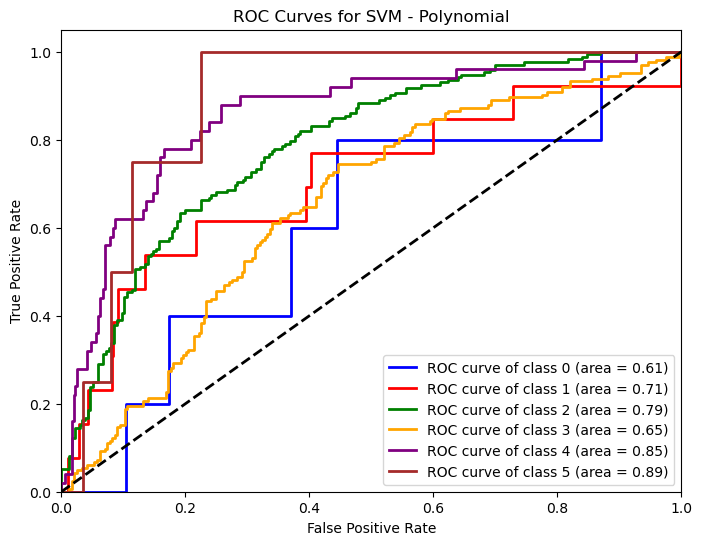


--- SVM - RBF ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.67      0.77      0.71       172
           6       0.58      0.65      0.61       164
           7       0.80      0.40      0.53        50
           8       0.00      0.00      0.00         4

    accuracy                           0.63       408
   macro avg       0.34      0.30      0.31       408
weighted avg       0.61      0.63      0.61       408

Confusion Matrix:
 [[  0   0   4   1   0   0]
 [  0   0   7   6   0   0]
 [  0   0 132  40   0   0]
 [  0   0  53 107   4   0]
 [  0   0   2  28  20   0]
 [  0   0   0   3   1   0]]
Accuracy: 0.6348039215686274
Precision: 0.611570393923335
Recall: 0.6348039215686274
F1-score: 0.6126289107243093


C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\m

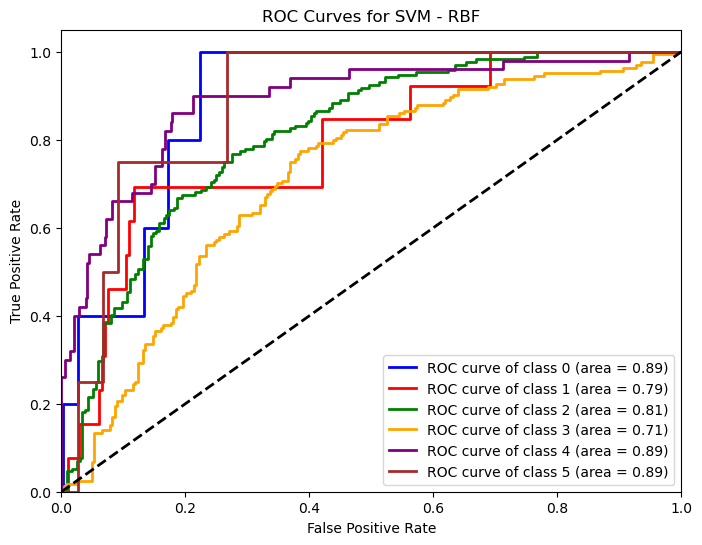


--- Neural Network ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.14      0.08      0.10        13
           5       0.62      0.74      0.67       172
           6       0.55      0.48      0.51       164
           7       0.48      0.52      0.50        50
           8       0.00      0.00      0.00         4

    accuracy                           0.57       408
   macro avg       0.30      0.30      0.30       408
weighted avg       0.55      0.57      0.55       408

Confusion Matrix:
 [[  0   1   3   0   1   0]
 [  0   1   8   4   0   0]
 [  0   4 127  37   4   0]
 [  0   1  64  78  21   0]
 [  0   0   4  20  26   0]
 [  0   0   0   2   2   0]]
Accuracy: 0.5686274509803921
Precision: 0.5458172944558637
Recall: 0.5686274509803921
F1-score: 0.5533301146809665
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\m

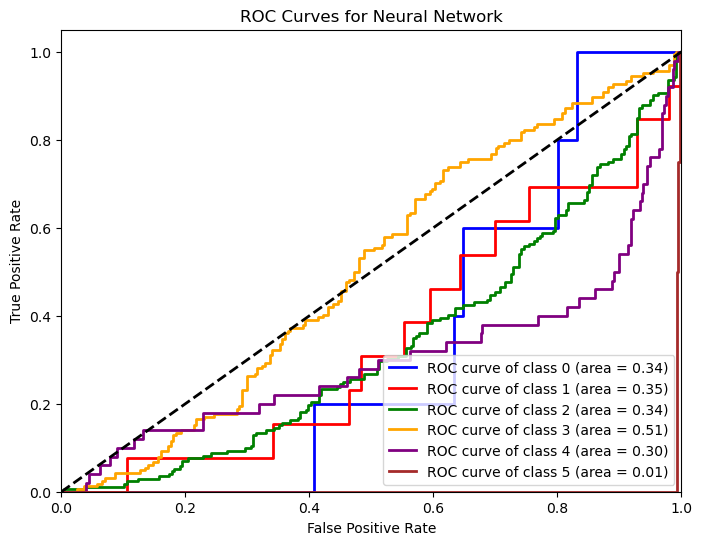

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Function to calculate metrics and plot ROC curve (for multi-class)
def evaluate_model(y_true, y_pred, model_name, X_test_scaled, model=None):
    print(f"\n--- {model_name} ---")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))

    # ROC Curve (for multi-class, requires probabilities)
    if model_name == "Neural Network":
        y_score = model.predict(X_test_scaled)
    elif model_name.startswith("SVM"):  # SVM with probability=True needs setup
        y_score = model.predict_proba(X_test_scaled)
    else:
        return  # Skip ROC for models without probabilities

    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate all models
evaluate_model(y_test, y_pred_linear, "SVM - Linear", X_test_scaled, svm_linear)
evaluate_model(y_test, y_pred_poly, "SVM - Polynomial", X_test_scaled, svm_poly)
evaluate_model(y_test, y_pred_rbf, "SVM - RBF", X_test_scaled, svm_rbf)
evaluate_model(y_test, y_pred_nn, "Neural Network", X_test_scaled, model)